In [1]:
import csv # csv 파일 처리 모듈

In [4]:
with open('data-files/seoul-temperature.csv', 'rt', encoding='utf-8') as f:
    reader = csv.reader(f) # csv 파일 처리기 만들기

    next(reader) # 한 행을 읽고 다음 행으로 이동 (헤더 읽어서 버리기)
    lines = []
    for line in reader:
        lines.append(line)

In [8]:
len(lines), lines[:5]

(40910,
 [['1907-10-01', '108', '13.5', '7.9', '20.7'],
  ['1907-10-02', '108', '16.2', '7.9', '22'],
  ['1907-10-03', '108', '16.2', '13.1', '21.3'],
  ['1907-10-04', '108', '16.5', '11.2', '22'],
  ['1907-10-05', '108', '17.6', '10.9', '25.4']])

In [46]:
# map(함수, 데이터) -> 데이터의 각 행에 함수를 적용해서 결과를 이터레이터로 반환
def to_float(x):
    try:
        fx = float(x)
    except:
        fx = -1000
    return fx

data = list( filter(lambda line: len(line) == 5, lines) ) # 각 행별로 데이터의 갯수가 5개인 행만 포함
# list( map(lambda line: to_float(line[4]), data) )
data = list( map(lambda line: line[:2] + \
                        list( map( lambda x: to_float(x), line[2:]) ), data ) )


In [45]:
len(data), data[:10]

(40909,
 [['1907-10-01', '108', 13.5, 7.9, 20.7],
  ['1907-10-02', '108', 16.2, 7.9, 22.0],
  ['1907-10-03', '108', 16.2, 13.1, 21.3],
  ['1907-10-04', '108', 16.5, 11.2, 22.0],
  ['1907-10-05', '108', 17.6, 10.9, 25.4],
  ['1907-10-06', '108', 13.0, 11.2, 21.3],
  ['1907-10-07', '108', 11.3, 6.3, 16.1],
  ['1907-10-08', '108', 8.9, 3.9, 14.9],
  ['1907-10-09', '108', 11.6, 3.8, 21.1],
  ['1907-10-10', '108', 14.2, 6.4, 24.1]])

In [49]:
# 가장 더웠던 날 (최고 기온이 가장 높았던 날) 및 온도

max_temperature = -1000
max_date = ''

for row in data:
    if row[4] > max_temperature:
        max_temperature = row[4] # 그 날의 최고 온도
        max_date = row[0] # 날짜
        
print(max_date, max_temperature)

2018-08-01 39.6


In [50]:
# 출생 이후 생일 중에서 가장 더웠던 날
birth_year = '1996'
birth_date = '12-10'
max_temperature = -1000
max_date = ''

for row in data:
    year = row[0][:4]
    date = row[0][5:]
    if birth_year <= year and birth_date == date:
        if row[4] > max_temperature:
            max_temperature = row[4]
            max_date = row[0]

print(max_date, max_temperature)

2008-12-10 13.3


In [56]:
# 월별로 데이터 구성 1 (월을 key로 하는 딕셔너리로 구성) --> { '01': [], '02': []}

data_by_month = {}

for idx, row in enumerate(data):
    month = row[0][5:7] # '2000-12-31' -> '12'
    # print(month)
    # if idx == 5: break
    if month in data_by_month:
        data_by_month[month].append(row)
    else:
        data_by_month[month] = [row]

data_by_month['01'][:5]

[['1908-01-01', '108', -5.9, -9.1, -1.3],
 ['1908-01-02', '108', -7.7, -13.9, -3.0],
 ['1908-01-03', '108', -6.2, -10.8, -2.9],
 ['1908-01-04', '108', -7.5, -12.8, -1.7],
 ['1908-01-05', '108', -4.8, -11.3, -0.1]]

In [59]:
# 월별로 데이터 구성 2 (월을 key로 하는 딕셔너리로 구성) --> { '01': [], '02': []}

from collections import defaultdict  # 딕셔너리에 키가 없으면 자동으로 만들고 다음 처리 수행

data_by_month = defaultdict(list)

for idx, row in enumerate(data):
    month = row[0][5:7] # '2000-12-31' -> '12'
    # print(month)
    # if idx == 5: break
    data_by_month[month].append(row)

data_by_month['01'][:20]

[['1908-01-01', '108', -5.9, -9.1, -1.3],
 ['1908-01-02', '108', -7.7, -13.9, -3.0],
 ['1908-01-03', '108', -6.2, -10.8, -2.9],
 ['1908-01-04', '108', -7.5, -12.8, -1.7],
 ['1908-01-05', '108', -4.8, -11.3, -0.1],
 ['1908-01-06', '108', -1.1, -5.1, 2.9],
 ['1908-01-07', '108', -4.4, -6.7, -1.2],
 ['1908-01-08', '108', -6.3, -10.4, -0.9],
 ['1908-01-09', '108', -3.2, -9.3, 2.0],
 ['1908-01-10', '108', 0.3, -4.5, 3.3],
 ['1908-01-11', '108', 1.7, -1.0, 4.8],
 ['1908-01-12', '108', 2.0, -1.3, 4.5],
 ['1908-01-13', '108', 1.4, -3.7, 4.7],
 ['1908-01-14', '108', -3.2, -7.4, 0.1],
 ['1908-01-15', '108', -1.9, -4.5, 0.9],
 ['1908-01-16', '108', -8.9, -11.2, -4.5],
 ['1908-01-17', '108', -6.5, -11.3, -3.6],
 ['1908-01-18', '108', 1.1, -3.9, 2.8],
 ['1908-01-19', '108', 1.7, 1.3, 2.8],
 ['1908-01-20', '108', -1.1, -7.4, 2.3]]

In [83]:
# True 일때 선택되는 값 if 조건식 else false일 때 선택되는 값
10 if len('hello') > 5 else 20

20

In [90]:
def mean_temperature_by_month(month, t='max'):
    
    month = "{0:02d}".format(month) # 8 -> "08"

    # 'mean' -> 2, 'min' -> 3, 'max' -> 4
    # idx = 2
    # if t == 'max':
    #     idx = 4
    # elif t == 'min':
    #     idx = 3
    # else:
    #     idx = 2

    idx = 2 if t == 'mean' else 3 if t == 'min' else 4

    total, cnt = 0, 0
    for row in data[:]:
        if month == row[0][5:7]:
            total += row[idx]
            cnt += 1
    return total / cnt

def mean_temperature_by_month2(month, t='max'):
    
    month = "{0:02d}".format(month) # 8 -> "08"

    total = 0
    for row in data_by_month[month]:
        total += row[4]

    return total / len(data_by_month[month])

mean_temperature_by_month2(8, t='min')

20.806567858180674

In [92]:
# 1년 중 일교차가 가장 큰 달 (max - min) 평균

gap_by_month = []
for month in range(1,13):
    mx = mean_temperature_by_month(month, 'max')
    mn = mean_temperature_by_month(month, 'min')
    gap_by_month.append((month, mx - mn))

gap_by_month.sort(key=lambda x: x[1], reverse=True)
gap_by_month

[(5, 10.664141705069124),
 (4, 10.632738095238063),
 (10, 10.317898943762398),
 (6, 9.576666666666668),
 (3, 9.408006912442357),
 (9, 9.240596125186283),
 (11, 9.23642857142852),
 (2, 8.696334913112254),
 (1, 8.273041474654448),
 (12, 8.10822548173708),
 (8, 7.887852368497475),
 (7, 7.244210829493063)]

In [94]:
gap_by_month[0], gap_by_month[:1]

((5, 10.664141705069124), [(5, 10.664141705069124)])

In [184]:
def pop_per_age_by_region(region):
    """
    동네이름을 사용해서 연령별 인구데이터를 검색하는 함수
    """

    with open('data-files/age.csv', 'rt', encoding='utf-8') as f:
        reader = csv.reader(f) # iterator 반환 (한 줄씩 접근할 수 있도록) -> 한 행은 리스트형식으로 반환

        next(reader)
        result = []
        for line in reader:
            if region in line[0]:
                result.append(line[:1] + [ int(x.replace(',', '')) for x in line[3:] ] )
    
    return result

In [9]:
line = ["서울특별시  (1100000000)","9,679,771","9,679,771","45,045","50,964","53,786","57,771","65,256","68,985","68,306","68,851","75,269","73,124","73,543","70,283","75,438","79,314","73,053","71,982","79,714","81,493","83,576","96,837","114,023","113,649","123,219","135,925","145,942","155,469","164,886","168,484","173,080","166,456","153,852","147,942","145,089","140,828","139,723","139,792","139,858","151,799","160,222","159,622","159,491","153,286","134,978","142,244","139,821","144,868","157,094","161,575","164,264","174,335","167,851","167,196","161,896","149,792","140,194","147,378","142,565","143,018","149,163","157,418","161,777","147,371","139,043","138,201","126,704","133,140","111,902","99,425","107,141","75,153","84,520","84,975","82,981","84,234","66,032","60,312","60,121","59,112","67,952","53,004","45,669","43,330","37,473","32,659","28,524","25,871","20,722","16,912","14,426","10,947","9,657","8,305","6,662","5,187","3,522","2,679","2,038","2,002","1,409","1,074","6,726"]

# line[:1] + line[3:]
# [ x for x in line[3:] ]
# [ x.replace(',','') for x in line[3:] ]
# [ int(x.replace(',','')) for x in line[3:] ]
line[:1] + [ int(x.replace(',','')) for x in line[3:] ]

['서울특별시  (1100000000)',
 45045,
 50964,
 53786,
 57771,
 65256,
 68985,
 68306,
 68851,
 75269,
 73124,
 73543,
 70283,
 75438,
 79314,
 73053,
 71982,
 79714,
 81493,
 83576,
 96837,
 114023,
 113649,
 123219,
 135925,
 145942,
 155469,
 164886,
 168484,
 173080,
 166456,
 153852,
 147942,
 145089,
 140828,
 139723,
 139792,
 139858,
 151799,
 160222,
 159622,
 159491,
 153286,
 134978,
 142244,
 139821,
 144868,
 157094,
 161575,
 164264,
 174335,
 167851,
 167196,
 161896,
 149792,
 140194,
 147378,
 142565,
 143018,
 149163,
 157418,
 161777,
 147371,
 139043,
 138201,
 126704,
 133140,
 111902,
 99425,
 107141,
 75153,
 84520,
 84975,
 82981,
 84234,
 66032,
 60312,
 60121,
 59112,
 67952,
 53004,
 45669,
 43330,
 37473,
 32659,
 28524,
 25871,
 20722,
 16912,
 14426,
 10947,
 9657,
 8305,
 6662,
 5187,
 3522,
 2679,
 2038,
 2002,
 1409,
 1074,
 6726]

In [185]:
result = pop_per_age_by_region('공릉')

In [186]:
# result
import matplotlib.pyplot as plt

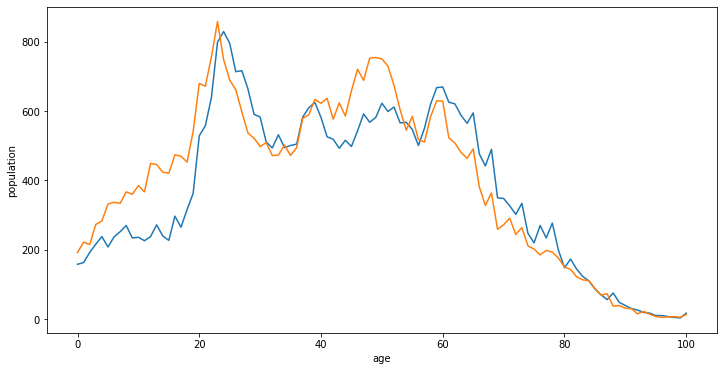

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(result[0][1:])
plt.plot(result[1][1:])
plt.xlabel('age')
plt.ylabel('population')
plt.show()

In [189]:
# age-with-gender.csv
# [ 행정구역, 전체인구통계, 남성인구통계, 여성인구통계]
# 지역명 -> 지역의 연령별, 성별 인구데이터 찾기
# 연령별 성비 도출

def pop_per_age_and_gender_by_region(region):
    """
    동네이름을 사용해서 연령별, 성별 인구데이터를 검색하는 함수
    """

    with open('data-files/age-with-gender.csv', 'rt', encoding='utf-8') as f:
        reader = csv.reader(f) 

        result = []
        for line in reader:
            if region in line[0]:
                result.append([ line[0], # 행정구역명
                                [ int(x.replace(',', '')) for x in line[106:207] ],     # 남성인구
                                [ int(x.replace(',', '')) for x in line[209:310] ]  ])  # 여성인구
    
    return result

In [197]:
result = pop_per_age_and_gender_by_region('전농제1동')

In [198]:
# 남성 / (남성 + 여성), 여성 / (남성 + 여성)
ratio = []
for male, female in zip(result[0][1], result[0][2]):
    total = male + female
    if total == 0:
        ratio.append((0, 0))
    else:
        ratio.append( (male / (male + female), female / (male + female) ) )   # 101개의 ratio 나올 것


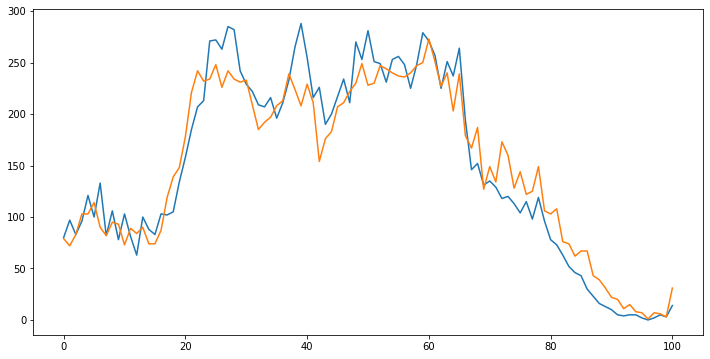

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(result[0][1])
plt.plot(result[0][2])
plt.show()

In [200]:
# 유임승차비율이 가장 높은 역

# 승하차 인원이 가장 많은 역 (이용객이 가장 많은 역)

In [216]:
subway_data = []
with open('data-files/subwayfee.csv', 'rt', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader) # 제목 행은 제거
    for line in reader:
        subway_data.append(line[:4] + \
                           [ int(x.replace(',','')) for x in line[4:] ])

subway_data[:5]

[['Nov-20', '1호선', '1', '서울역', 970425, 919628, 163629, 153605],
 ['Nov-20', '1호선', '10', '동묘앞', 123243, 131205, 130264, 131631],
 ['Nov-20', '1호선', '2', '시청', 470299, 476546, 61681, 59054],
 ['Nov-20', '1호선', '3', '종각', 779391, 757727, 111601, 103762],
 ['Nov-20', '1호선', '4', '종로3가', 415759, 380983, 253486, 236161]]

In [225]:
for row in subway_data:
    total = row[4] + row[6]
    if total > 100000:
        if len(row) > 8:
            row[8] = round(row[4] / total, 2)
        else:
            row.append( round(row[4] / total, 2) )
    else:
        if len(row) > 8:
            row[8] = 0
        else:
            row.append( 0 )

In [226]:
subway_data[:10]

[['Nov-20', '1호선', '1', '서울역', 970425, 919628, 163629, 153605, 0.86],
 ['Nov-20', '1호선', '10', '동묘앞', 123243, 131205, 130264, 131631, 0.49],
 ['Nov-20', '1호선', '2', '시청', 470299, 476546, 61681, 59054, 0.88],
 ['Nov-20', '1호선', '3', '종각', 779391, 757727, 111601, 103762, 0.87],
 ['Nov-20', '1호선', '4', '종로3가', 415759, 380983, 253486, 236161, 0.62],
 ['Nov-20', '1호선', '5', '종로5가', 342225, 351197, 205830, 197086, 0.62],
 ['Nov-20', '1호선', '6', '동대문', 209906, 213469, 106156, 108389, 0.66],
 ['Nov-20', '1호선', '7', '신설동', 263272, 252254, 100228, 93219, 0.72],
 ['Nov-20', '1호선', '8', '제기동', 223204, 216130, 240998, 257699, 0.48],
 ['Nov-20', '1호선', '9', '청량리(서울시립대입구)', 320602, 315752, 238000, 240168, 0.57]]

In [227]:
subway_data.sort(key=lambda row: row[8], reverse=True)

In [228]:
subway_data[:10]

[['Nov-20', '경부선', '121', '서울역', 145486, 37641, 8385, 1930, 0.95],
 ['Nov-20',
  '공항철도 1호선',
  '644',
  '마곡나루(서울식물원)',
  173255,
  166982,
  9365,
  9389,
  0.95],
 ['Nov-20', '2호선', '19', '한양대', 193058, 210112, 11357, 11982, 0.94],
 ['Nov-20', '2호선', '49', '홍대입구', 1306396, 1406694, 81110, 78081, 0.94],
 ['Nov-20', '9호선', '616', '여의도', 524073, 504168, 34742, 32231, 0.94],
 ['Nov-20', '9호선', '626', '신논현', 746935, 759289, 50327, 47134, 0.94],
 ['Nov-20', '공항철도 1호선', '642', '홍대입구', 221472, 228513, 14031, 13211, 0.94],
 ['Nov-20', '공항철도 1호선', '643', '디지털미디어시티', 313729, 280132, 19303, 18019, 0.94],
 ['Nov-20', '공항철도 1호선', '645', '김포공항', 301497, 169301, 19268, 12768, 0.94],
 ['Nov-20', '공항철도 1호선', '648', '청라국제도시', 155921, 145232, 9657, 9350, 0.94]]

In [229]:
for row in subway_data:
    if len(row) > 9:
        row[9] = sum(row[4:8])
    else:
        row.append( sum(row[4:8]) )

In [232]:
subway_data.sort(key=lambda row: row[9], reverse=True)

In [235]:
subway_data[:5]

[['Nov-20',
  '2호선',
  '32',
  '강남',
  2019373,
  2046712,
  144790,
  129444,
  0.93,
  4340319],
 ['Nov-20',
  '2호선',
  '26',
  '잠실(송파구청)',
  1604232,
  1593912,
  148702,
  142275,
  0.92,
  3489121],
 ['Nov-20',
  '2호선',
  '40',
  '신림',
  1494668,
  1430345,
  185327,
  187900,
  0.89,
  3298240],
 ['Nov-20',
  '2호선',
  '42',
  '구로디지털단지',
  1418737,
  1418268,
  137282,
  139421,
  0.91,
  3113708],
 ['Nov-20',
  '2호선',
  '49',
  '홍대입구',
  1306396,
  1406694,
  81110,
  78081,
  0.94,
  2872281]]